In [1]:
import cv2
import time
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'Hands11k/'
fnames = os.listdir(path)
len(fnames)

11075

In [3]:
def cut_based_on_bi(fname,threshold_x_min,threshold_x_max,threshold_y_min,threshold_y_max):
    print('fname: ',fname)
    img = cv2.imread(path+fname)
    img_gray = (cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    ret, img_bi = cv2.threshold(img_gray, 220, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(cv2.cvtColor(img_bi, cv2.COLOR_BGR2RGB))
    plt.show()   
    
    
    y_min,y_max,x_min,x_max = 0, img.shape[1]-1, 0, img.shape[0]-1
    
    for i in range(img.shape[0]):
        raw_total = np.sum(img_bi[:][i])
        raw_average =  raw_total/(img.shape[1]*255)
        x_min = i  
        if raw_average > threshold_x_min:
            print('final x_min: ',i)
            break
    for i_inverse in range(img.shape[0]):
        i_inverse += 1
        i = img.shape[0]-i_inverse
        raw_total = np.sum(img_bi[:][i])
        raw_average =  raw_total/(img.shape[1]*255)
        x_max = i  
        if raw_average > threshold_x_max:
            print('final x_max: ',i)
            break
    for i in range(img.shape[1]):
        col_total = np.sum(img_bi.T[i].T)
        col_average =  col_total/(img.shape[1]*255)
        y_min = i  
        if col_average > threshold_y_min:
            print('final y_min: ',i)
            break    
    for i_inverse in range(img.shape[1]):
        i_inverse += 1
        i = img.shape[1]-i_inverse
        col_total = np.sum(img_bi.T[i].T) # 1046 elements
        col_average =  col_total/(img.shape[0]*255)
        y_max = i  
        if col_average > threshold_y_max:
            print('final y_max: ',i)
            break    

    cut = img[x_min:x_max,y_min:y_max]
    plt.imshow(cv2.cvtColor(cut, cv2.COLOR_BGR2RGB))
    plt.show()        

fname:  00000000.jpg


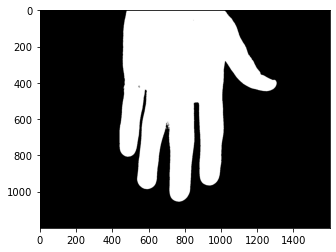

final x_min:  23
final x_max:  1053
final y_min:  439
final y_max:  1274


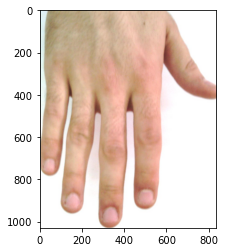

In [4]:
cut_based_on_bi(fnames[0],0.35,0.01,0.01,0.05)
#threshold_x_min,threshold_x_max,threshold_y_min,threshold_y_max